In [7]:
# Libraries are imported

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [51]:
# Data set is loaded

df = pd.read_csv("battle_royale_train.csv")

df.loc[:, "CHAS"] = df.loc[:, "CHAS"].astype("category")

<AxesSubplot:xlabel='PRICE'>

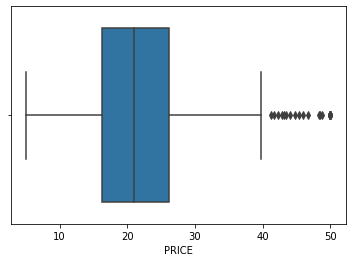

In [52]:
# Box plot of the target variable. It seems to indicate there are a few outliers present
# Values above 40 seem to be outliers.

sns.boxplot(df.loc[:, "PRICE"])

Univariate distributions


Criminality seems to be low for most neighborhoods but there are a series of outliers with higher crime rates

Most neighborhoods seem to be zoned for houses smaller than 25,000 square ft with the exception of around 15 outliers

The number of rooms per house has outliers on both ends. Most houses have between 5 and 8 rooms

The vast majority of houses were built prior to 1940 most neighborhoods have a proportion above 50%

Most houses seem to be close to employment centers with a few outliers that are far

Pupil-teacher ratio seems to be high for the majority of neighborhoods

See boxplots below

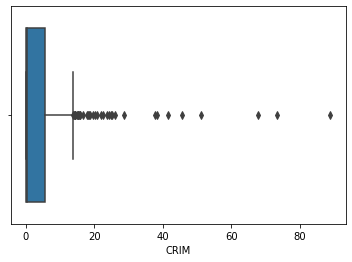

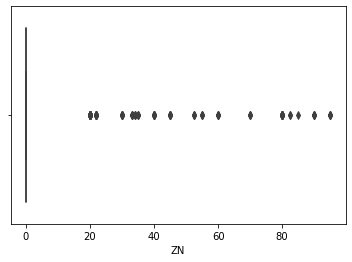

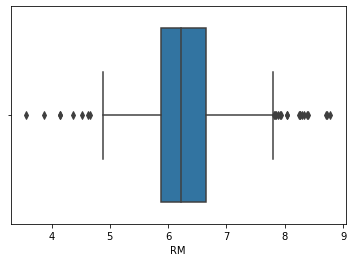

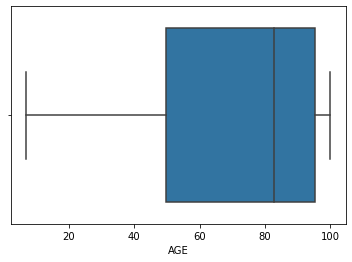

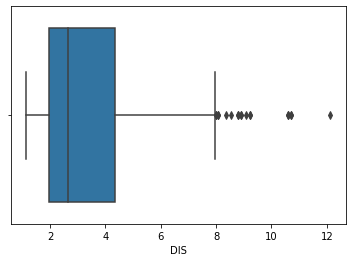

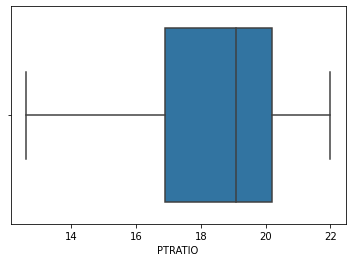

In [53]:
vars_list = ["CRIM", "ZN", "RM", "AGE", "DIS", "PTRATIO"]

for variable in vars_list:
    
    sns.boxplot(df.loc[:, variable])
    
    plt.show()

Correlation analysis vs target variable

The number of rooms seems to have the strongest correlation

Air quality and proportion of industrial zoning have a correlation with price too, but it's weaker.

Crime doesn't have a correlation with price when it's at its lowest but it does as it increases.

Houses with a high proportion of older houses seem to have lower prices on average but it's not a strong correlation. There is a high concentration of data points above 80%

Unexpectedly, prices increase the further you are from employment centers up to a certain degree

Pupil-teacher ratio seems to have a stronger correlation than other variables.

Percentage of residents with lower status has a high correlation but there is a trend change after around 12%

See scatterplots below

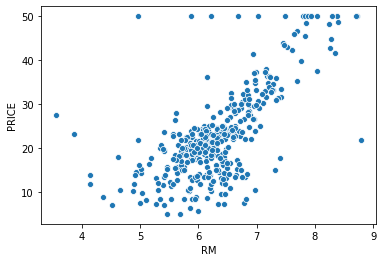

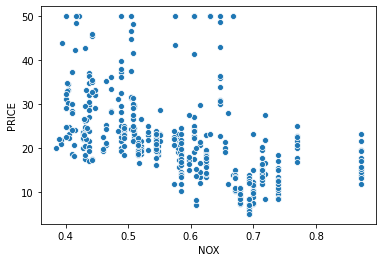

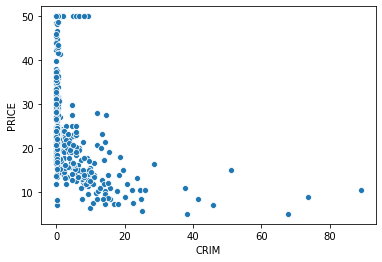

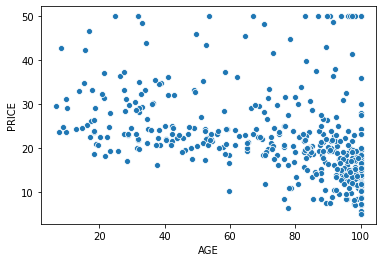

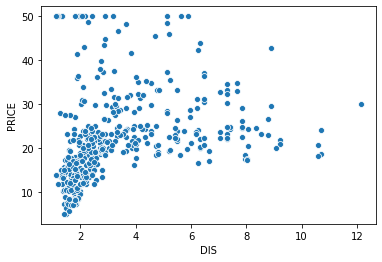

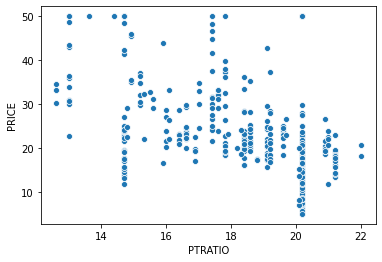

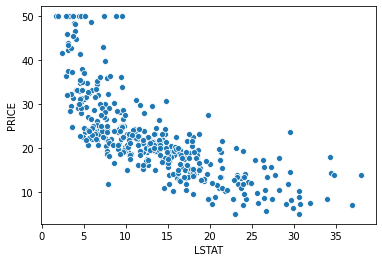

In [54]:
vars_list = ["RM", "NOX", "CRIM", "AGE", "DIS", "PTRATIO", "LSTAT"]

for variable in vars_list:
    
    sns.scatterplot(x = df.loc[:, variable], y = df.loc[:, "PRICE"])
    
    plt.show()

In [55]:
# Crim flags between 5 and 30, above 30
# AGE above 80
# ZN above 20
# DIS above 3
# LSTAT above 12

low_crim = [1 if x < 5 else 0 for x in df.loc[:, "CRIM"]]

high_crim = [1 if x > 30 else 0 for x in df.loc[:, "CRIM"]]

high_zn = [1 if x > 20 else 0 for x in df.loc[:, "ZN"]]

far_dis = [1 if x > 3 else 0 for x in df.loc[:, "DIS"]]

high_lstat = [1 if x > 12 else 0 for x in df.loc[:, "LSTAT"]]

df = pd.concat([df, pd.Series(low_crim), 
           pd.Series(high_crim), 
           pd.Series(high_zn), 
           pd.Series(far_dis), 
           pd.Series(high_lstat)], axis = 1)

df.rename(columns = {0 : "low_crim",
                     1 : "high_crim",
                     2 : "high_zn", 
                     3 : "far_dis", 
                     4 : "high_lstat"}, inplace = True)

In [142]:
# Data set is split into training and validation

df = df.sample(frac = 1, random_state = 1104)

test_df = df.iloc[0:101, :]

target_test = test_df.loc[:, "PRICE"]

train_df = df.iloc[101:, :]

target_train = train_df.loc[:, "PRICE"]

X_test = test_df.drop("PRICE", axis = 1)

X_train = train_df.drop("PRICE", axis = 1)\

vars_list = ['low_crim', 'high_crim', 'high_zn', 'far_dis', 'high_lstat', 
             'CRIM', "RM", "NOX", "AGE", "DIS", "PTRATIO", "LSTAT", "ZN"]

X_train = X_train.loc[:, vars_list]

X_test = X_test.loc[:, vars_list]

In [143]:
# Model 1 OLS Regression

from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X = X_train, y = target_train)

model_1.score(X = X_test, y = target_test)

0.7285620135273706